# Analiza podatkov

V tem razdelku projektne naloge bom analiziral podatke, ki sem jih dobil iz spletne strani https://judoinside.com/. Najprej uvozimo knjižnjico pandas in z njeno pomočjo prenesemo tudi tabeli podatkov. naredimo tudi novo tabelo, ki nastane, če obe tabeli združimo.

In [1]:
import pandas as pd
import analiza_koda

judoisti = pd.read_csv('judoisti.csv')
tekmovalci = pd.read_csv('tekmovalci.csv')
skupna_tabela = pd.merge(judoisti, tekmovalci)


Poglejmo kako združena tabela izgleda

In [18]:
skupna_tabela

,ime,drzava,datum,rezultat,dogodek,kategorija
0,Maarten Arens,Netherlands,2000,7,European Championships Wroclaw,U81
1,Maarten Arens,Netherlands,1999,2,European Championships Bratislava,U81
2,Maarten Arens,Netherlands,1998,5,European Championships Oviedo,U81
3,Maarten Arens,Netherlands,1995,1,European Championships Birmingham,U86
4,Maarten Arens,Netherlands,2001,3,Dutch Open Grand Prix Rotterdam,U81
...,...,...,...,...,...,...
252172,Antoine De Roover,France,2020,2,Tournoi Open Bresse,U66
252173,Simon Mourgues,France,2019,2,Label B Tournament Lamballe,U60
252174,Tigran Hovhannisyan,France,2023,2,USA Junior Olympic Championships Shreveport,U90
252175,Tigran Hovhannisyan,France,2023,1,USA Cadet Olympic Championships Shreveport,U90


### Število judoistov v državah

Za začetek poglejmo v kateri državi je največ judoistov. Ker je na svetu veliko držav bomo pogledali samo prvih 50.

In [2]:
drzave = skupna_tabela.groupby('drzava').size().sort_values(ascending=False).head(50)
drzave

drzava
France            20793
Germany           15328
Netherlands       12268
Italy             11069
Slovenia          10330
Russia            10000
Spain              9057
Austria            8610
Poland             8394
Belgium            8182
Hungary            8169
Japan              7136
Canada             6511
Switzerland        6278
Romania            5849
Croatia            5740
Portugal           5725
Ukraine            4896
Brazil             4168
Australia          3848
Türkiye            3791
Finland            3784
Serbia             3782
Sweden             3572
Slovakia           3319
Bulgaria           3226
Lithuania          3217
Estonia            2896
Georgia            2857
Azerbaijan         2758
Belarus            2757
Cuba               2545
Israel             2530
Kazakhstan         2045
Norway             1823
Mongolia           1763
Uzbekistan         1628
Montenegro         1623
Yugoslavia         1587
Mexico             1559
Czechoslovakia     1409
Denmark  

Naredimo še graf za lažjo predstavo.

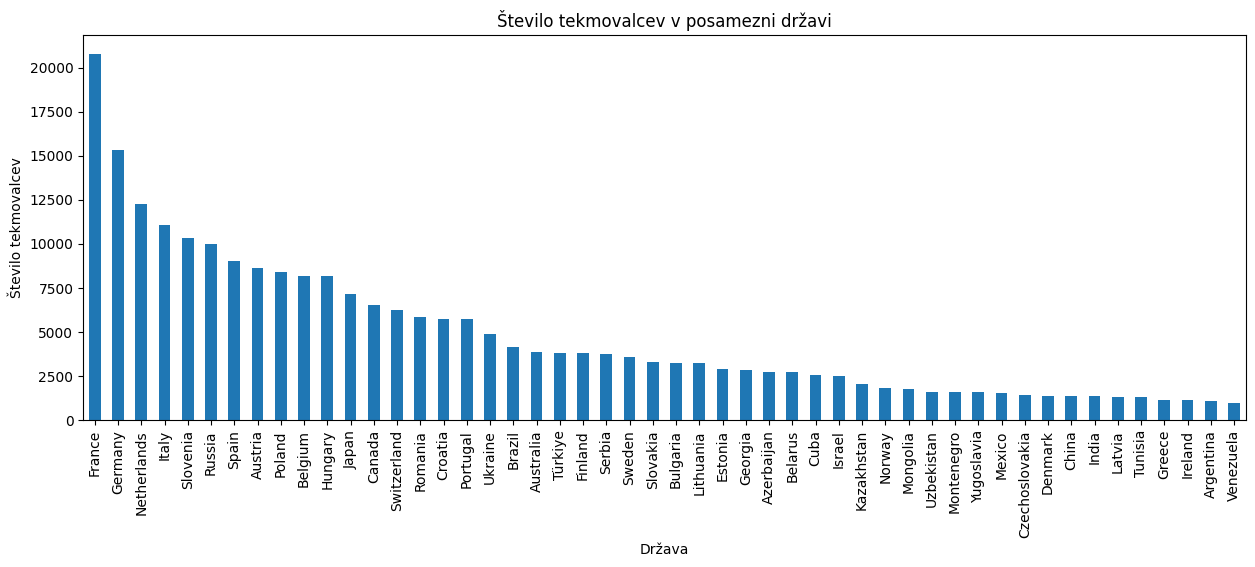

In [3]:
analiza_koda.drzave(drzave)

Opazimo, da je v franciji daleč največ judoistov. To ni tako presenetljivo, saj je francija velika država in je tam judo tudi zelo popularen. Veliko bolj me je presenetilo, da je slovenija tako visoko na seznamu. Celo višje kot japonska, za katero sem mislil, da bo veliko višje. Opazimo lahko tudi, da je na seznamu večinoma evropske države. Predvidevam, da je to zato, saj je judo v evropi zelo popularen in ni dokumentiranih veliko tekem na nižjem nivoju izven evrope.

### Najbolj uspešni tekmovalci

Kot zanimivost naredimo saznama ljudi, ki imajo največ osvojenih medalji.

In [4]:
najbolj_uspesni = tekmovalci[tekmovalci.rezultat <= 3].groupby('ime').size().sort_values(ascending=False).head(20)
najbolj_uspesni

ime
 unknown              135
Telma Monteiro         93
Isabel Fernández       91
Ilse Heylen            87
Kelita Zupancic        84
Jenny Gal              84
Driulis Gonzalez       84
Priscilla Morand       82
Anamari Velensek       82
Anka Pogacnik          81
Alina Dumitru          80
Vito Dragic            79
Ulla Werbrouck         74
Andreea Chitu          73
Andreja Leski          72
Legna Verdecia         72
Anja Stangar           72
Amarilis Savón         72
Yordanis Arencibia     71
Reka Pupp              71
dtype: int64

Poglejmo si tudi kateri ljudje so bili največkrat čisto blizu medalje a so jo za las zgrešili. 

In [5]:
tekmovalci[tekmovalci.rezultat >= 5].groupby('ime').size().sort_values(ascending= False).head(20)

ime
Yahima Ramirez         42
Sarah Adlington        38
Sabrina Filzmoser      37
Andreea Chitu          36
Ivana Maranic          33
Hilde Drexler          33
Luise Malzahn          33
Ilse Heylen            32
Hannah Martin          32
Hedvig Karakas         31
Jevgenijs Borodavko    28
Gili Cohen             28
Jaana Sundberg         28
Milan Randl            27
Valentina Moscatt      27
Ketleyn Quadros        27
Nick Delpopolo         27
Cathérine Jacques      27
Joana Ramos            27
Miryam Roper           27
dtype: int64

### Najboljši v vsakem letu

Iz podatkov, ki jih imamo lahko izvemo tudi, kateri judoisti so bili v vsakem letu naj uspešnejši.

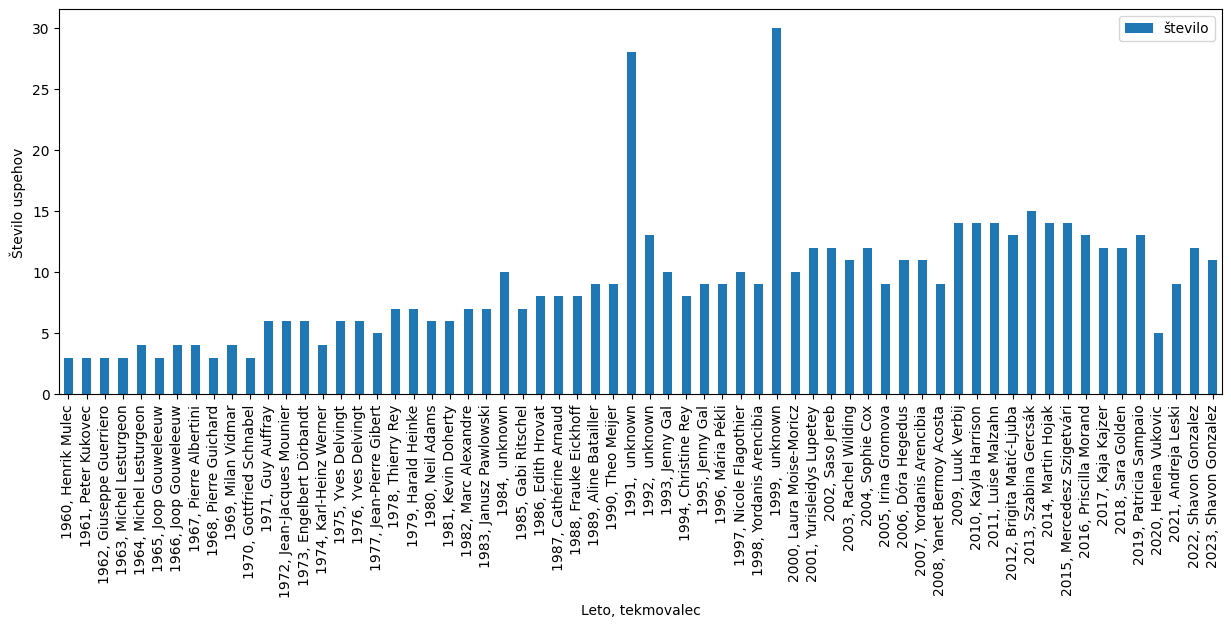

In [6]:
analiza_koda.najboljsi_leto(tekmovalci)

Iz grafa lahko poleg, kdo je bil vsako leto najuspešnejši vidimo tudi da se je z leti število tekem povečalo.

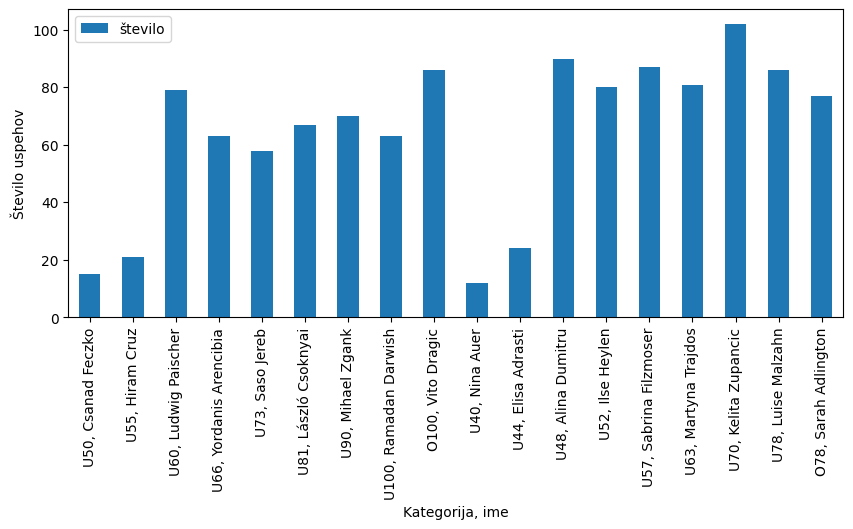

In [7]:
analiza_koda.najboljsi_kategorija(tekmovalci)

Vidimo lahko, da tekmovalci v kategorijah U50, U55, U40 in U44 nimajo tako veliko uspehov kot v drugih kategorijah.
To je zato saj te kategorije obstajajo samo za kadete in mladince. V teh starostnih kategorijah pa lahko tekmuješ pri kadetih 2 leti pri mladinceh pa 3 leta.

### Najbolj popularna tekmovanja

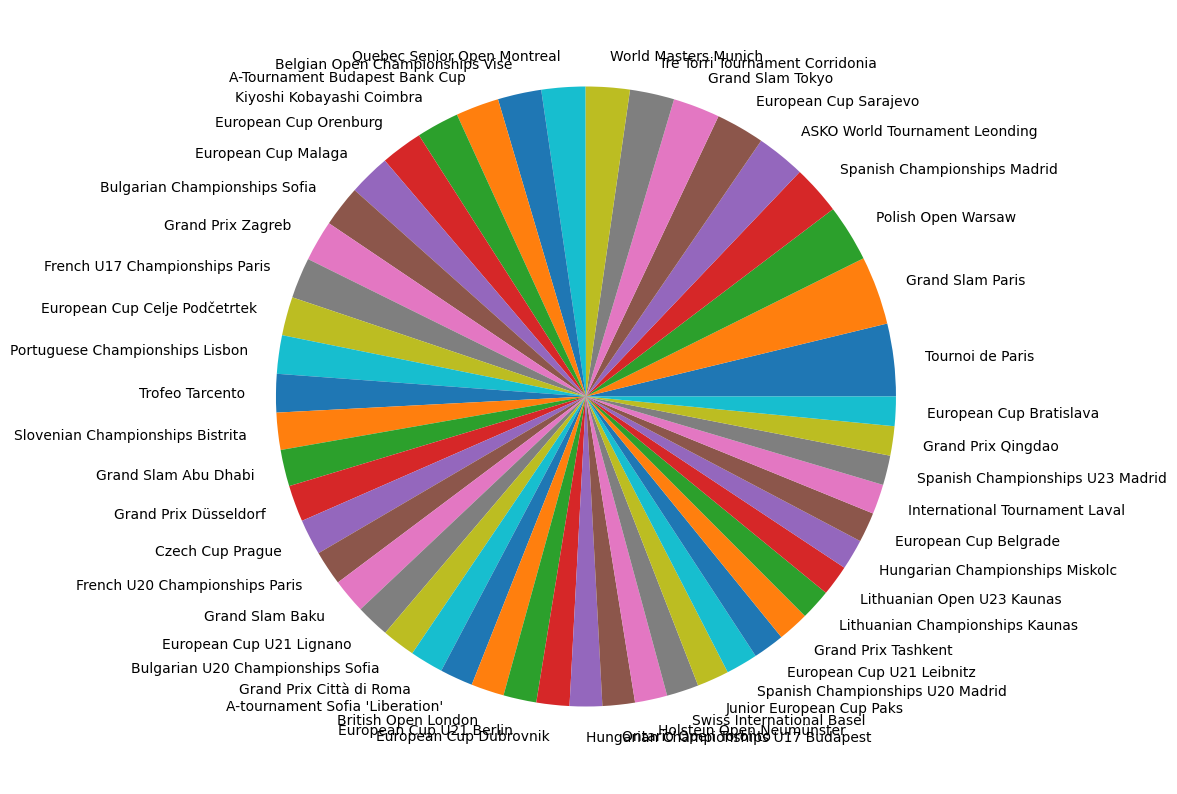

In [8]:
analiza_koda.pop_tekme(tekmovalci)

### Popularnost juda v sloveniji

Kot judoist iz slovenije me zanima, kako se je popularnost judo spreminjala skozi leta.

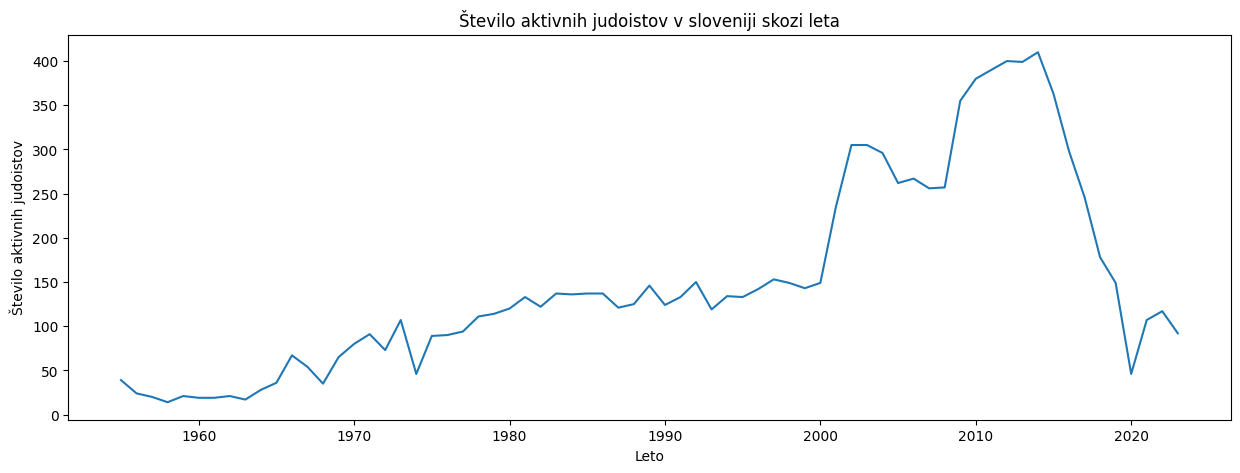

In [9]:
analiza_koda.tekmovalci_slovenija(skupna_tabela)

Vidimo lahko, da je v 2014 bilo v sloveniji največ aktivnih tekmovalcev nato pa to število začelo upadati. Mislim, da judo sedaj ni nič manj popularen. Upadec števila aktivniih tekmovalcev, lahko pripišemo temu, da ko sem jemal podatke sem vzel samo prvih 100'000. Opazil sem, da veliko tekem prinesejo maljši judoisti, katerih pa za tista leta nisem zajel v svoji analizi.